# Visualizing Nobel Prizes History

## The Nobel Prize
The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever.
I'am going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. 

In [1]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

# Reading in the Nobel Prize data
nobel = pd.read_csv('datasets/nobel.csv')
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [2]:
# Check if we have duplicate rows
nobel[nobel.duplicated(keep=False)]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country


In [3]:
# Taking a look at the first several winners
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## So, who gets the Nobel Prize?
Just looking at the first couple of prize winners, or Nobel laureates as they are also called we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?
(For country, I will use the 'birth_country' of the winner, as the 'organization_country' is NaN for all shared Nobel Prizes.)

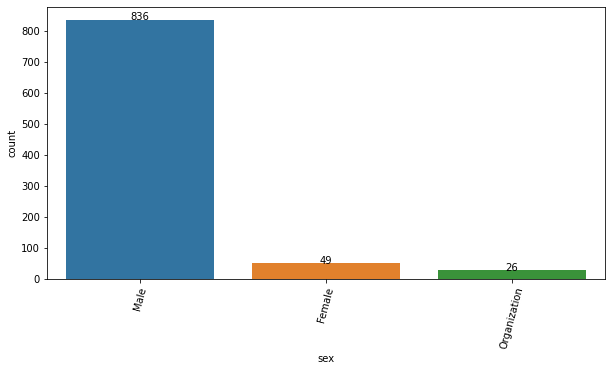

In [4]:
# Replace missing values with 'unknown' 
nobel['sex'] = nobel['sex'].fillna('Organization')

# Display the number of prizes won by male and female between 1901 and 2016
plt.figure(figsize=(10,5))
graph = sns.countplot(data = nobel, x = 'sex')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.xticks(rotation = 75)
plt.show()

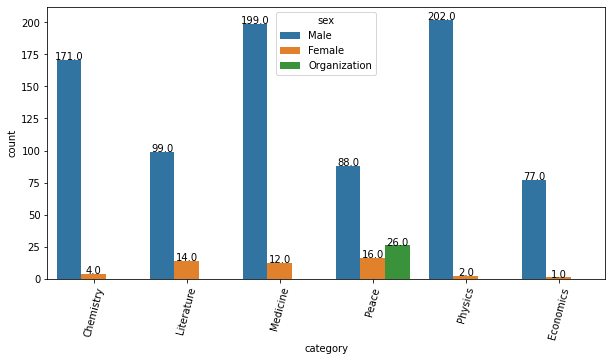

In [5]:
# Plotting the number of winners by sex and category
plt.figure(figsize=(10,5))
graph = sns.countplot(data = nobel, x = 'category', hue = 'sex')
for p in graph.patches:
    height = p.get_height()
    if height > 0:
        graph.text(p.get_x()+p.get_width()/2., height + 0.1, height, ha="center")
plt.xticks(rotation = 75)
plt.show()

* Men have been awarded 834 Nobel Prizes compared to only 49 prizes awarded to female laureates, and 29 prizes awarded to oragnizations (see chart above).

## Which are the countries that have won the most Nobel prizes

In [6]:
# Inspect data in 'review_month' column.
display(nobel['birth_country'].isna().sum())
nobel['birth_country'].unique()[:30]

26

array(['Netherlands', 'France', 'Prussia (Poland)', 'Switzerland',
       'Prussia (Germany)', 'Schleswig (Germany)', 'India', 'Sweden',
       'Norway', 'Faroe Islands (Denmark)', 'United Kingdom',
       'Russian Empire (Poland)', 'Scotland', 'Spain', 'Russia', nan,
       'Poland', 'Germany', 'Austrian Empire (Czech Republic)',
       'Hungary (Slovakia)', 'Tuscany (Italy)', 'Italy',
       'United States of America', 'Bavaria (Germany)',
       'British India (India)', 'Austrian Empire (Italy)', 'New Zealand',
       'East Friesland (Germany)', 'Russian Empire (Ukraine)', 'Denmark'],
      dtype=object)

In [7]:
# Replace missing values with 'unknown' and extract the name of the country
nobel['birth_country'] = nobel['birth_country'].fillna('Unknown')
nobel['birth_country'] = nobel['birth_country'].str.replace(')', '')
nobel['birth_country'] = nobel['birth_country'].str.split('(')
nobel['birth_country'] = [x[-1] for x in nobel['birth_country']]
nobel['birth_country'].unique()[:30]

array(['Netherlands', 'France', 'Poland', 'Switzerland', 'Germany',
       'India', 'Sweden', 'Norway', 'Denmark', 'United Kingdom',
       'Scotland', 'Spain', 'Russia', 'Unknown', 'Czech Republic',
       'Slovakia', 'Italy', 'United States of America', 'New Zealand',
       'Ukraine', 'Luxembourg', 'Latvia', 'Belgium', 'Austria',
       'Australia', 'Slovenia', 'Ireland', 'Canada', 'Indonesia',
       'Argentina'], dtype=object)

Text(0, 0.5, 'Number of prizes')

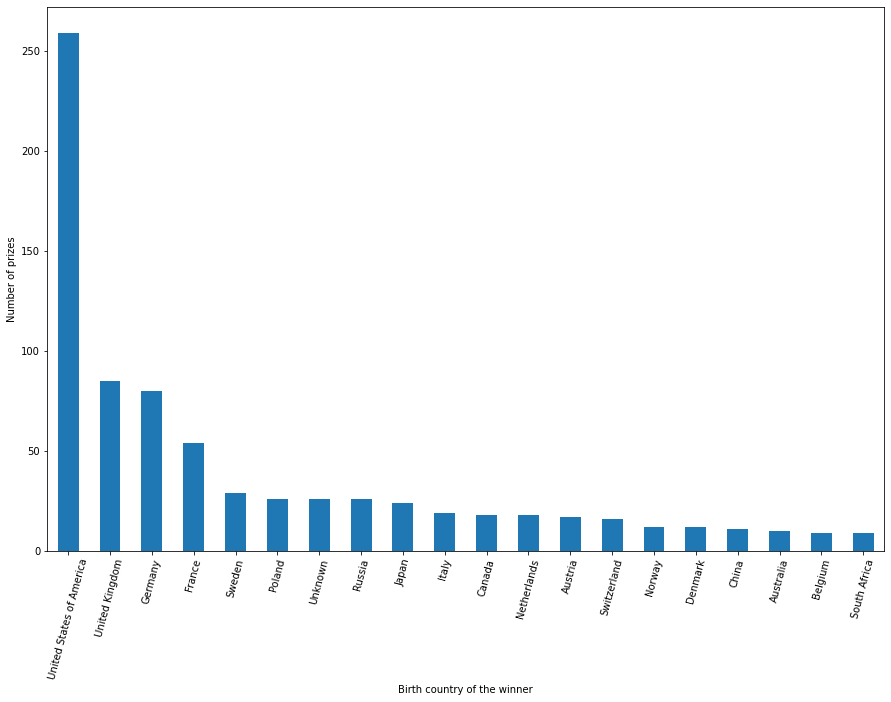

In [8]:
# Plot the number of prizes won by the top 20 nationalities
country = nobel.groupby("birth_country").size().sort_values(ascending = False)

# Summary statistic of all countries
plt.figure(figsize = (15, 10))
country.head(20).plot.bar()
plt.xticks(rotation = 75)
plt.xlabel('Birth country of the winner')
plt.ylabel('Number of prizes')

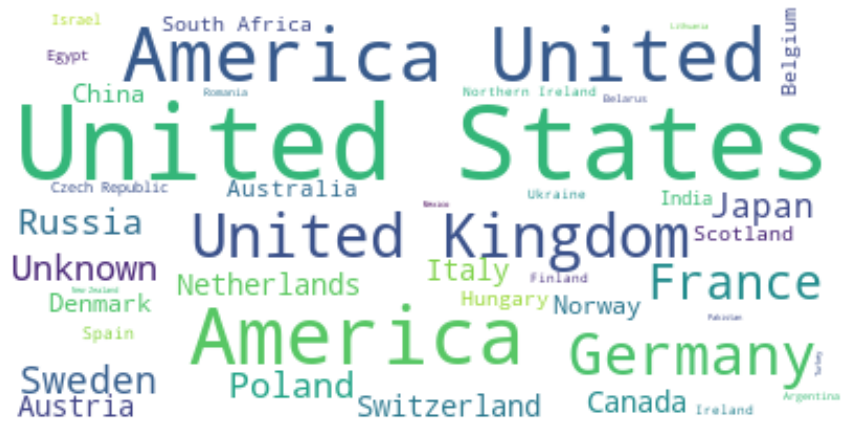

In [9]:
# Create and generate a word cloud image with all the birth coutry:
text = ' '.join(list(nobel['birth_country']))
wordcloud = WordCloud(max_font_size = 50, background_color = 'white').generate(text)

# Display the generated image:
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## USA dominance
Not so surprising the United States of America have taken the most prizes. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

In [10]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel.birth_country.isin(['United States of America'])
nobel['decade'] = nobel.year.apply(lambda x: int(np.floor(x/10)*10))
prop_usa_winners = nobel.groupby('decade', as_index= False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## USA dominance, visualized
A table is OK, but to see when the USA started to dominate the Nobel charts we need a plot!

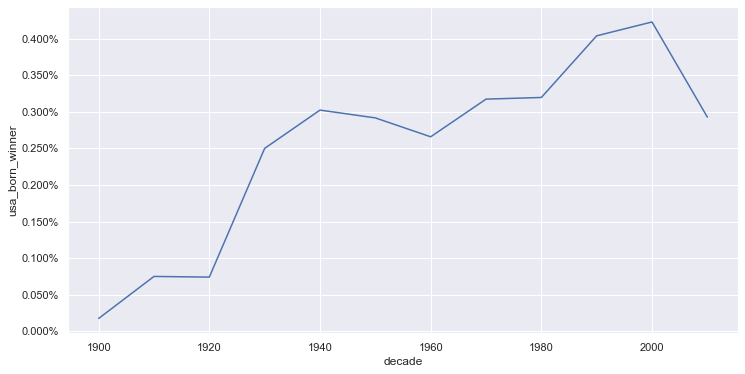

In [11]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))

# Plotting USA born winners 
ax = sns.lineplot(data=prop_usa_winners, x='decade', y ='usa_born_winner')

# Adding %-formatting to the y-axis
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## What is the gender of a typical Nobel Prize winner?
So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

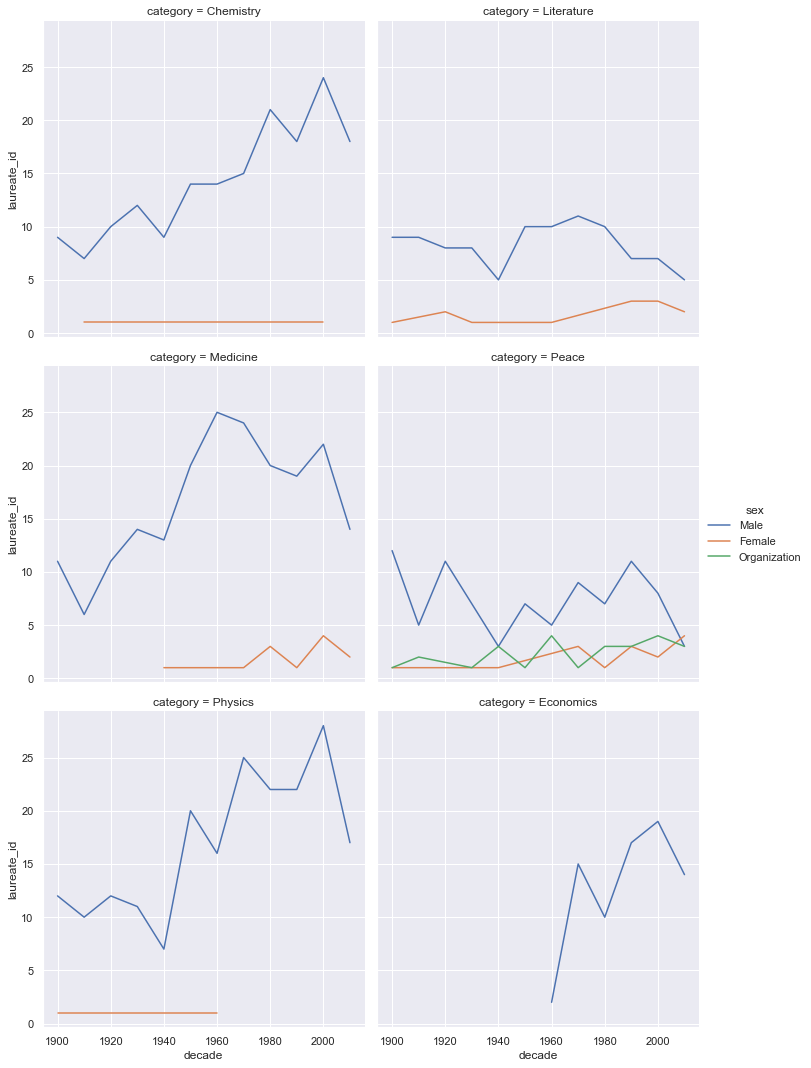

In [12]:
# Replace missing values with 'unknown' 
nobel['sex'] = nobel['sex'].fillna('Organization')

# Calculating the number of male and female laureates per decade
num_winners = nobel.groupby(['decade', 'category', 'sex'], as_index=False)['laureate_id'].count()

# Plotting winners by sex and category
sns.relplot(data = num_winners, x = 'decade', y = 'laureate_id', kind ='line', hue = 'sex', col = 'category', col_wrap = 2)
plt.show()

## The first woman to win the Nobel Prize
The plot above show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, medicin and chemistry having the largest imbalance. Peace  has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. Organizations win only peace prize.
Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [13]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel.sex == 'Female'].nsmallest(1, 'year', keep='first')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Poland,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900


## Repeat laureates
For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? 

In [14]:
# Selecting the laureates that have received 2 or more prizes.
winner_more2_prizes = nobel.groupby('full_name').filter(lambda x: x['prize'].count()>=2)
winner_more2_prizes[['category','prize', 'full_name', 'year', 'sex']].sort_values(by = 'full_name')

,category,prize,full_name,year,sex
89,Peace,The Nobel Peace Prize 1917,Comité international de la Croix Rouge (Intern...,1917,Organization
215,Peace,The Nobel Peace Prize 1944,Comité international de la Croix Rouge (Intern...,1944,Organization
348,Peace,The Nobel Peace Prize 1963,Comité international de la Croix Rouge (Intern...,1963,Organization
306,Chemistry,The Nobel Prize in Chemistry 1958,Frederick Sanger,1958,Male
505,Chemistry,The Nobel Prize in Chemistry 1980,Frederick Sanger,1980,Male
298,Physics,The Nobel Prize in Physics 1956,John Bardeen,1956,Male
424,Physics,The Nobel Prize in Physics 1972,John Bardeen,1972,Male
278,Chemistry,The Nobel Prize in Chemistry 1954,Linus Carl Pauling,1954,Male
340,Peace,The Nobel Peace Prize 1962,Linus Carl Pauling,1962,Male
19,Physics,The Nobel Prize in Physics 1903,"Marie Curie, née Sklodowska",1903,Female


## How old are the winners when they get the prize?
The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.

But how old are you generally when you get the prize?

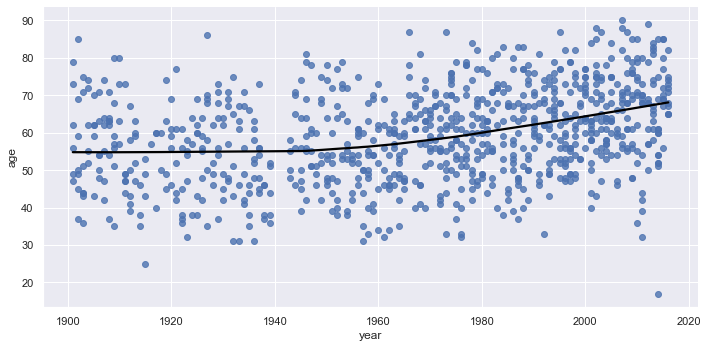

In [15]:
# Converting birth_date from String to datetime
nobel = nobel.dropna(subset =['birth_date'], axis = 0)
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel.year - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(data = nobel, x = 'year', y ='age',  lowess=True, aspect=2, line_kws={'color' : 'black'})
plt.show()

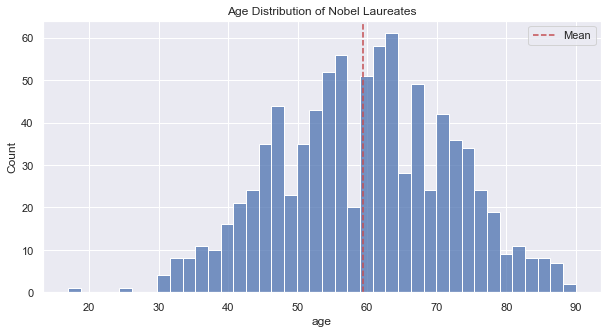

In [16]:
# Age distribution of Nobel laureates
plt.figure(figsize =(10, 5))
sns.histplot(data = nobel, x = 'age',  bins = 40).set_title('Age Distribution of Nobel Laureates')
plt.axvline(nobel['age'].mean(), label ='Mean', linestyle ='--', color ='r')
plt.legend()
plt.show()

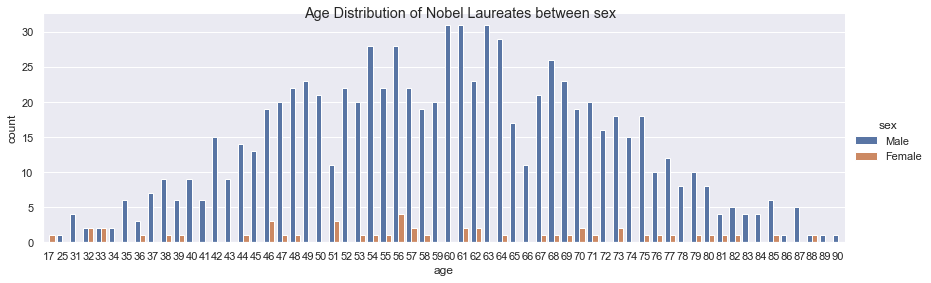

In [17]:
# Age distribution of Nobel laureates between sex
sns.catplot(data = nobel, x = 'age',  hue = 'sex', kind ='count', 
            height = 4, aspect = 3).fig.suptitle('Age Distribution of Nobel Laureates between sex')
plt.show()

## Age differences between prize categories and sex
The plots above shows us that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).

Let's look at age trends within different prize categories and sex.

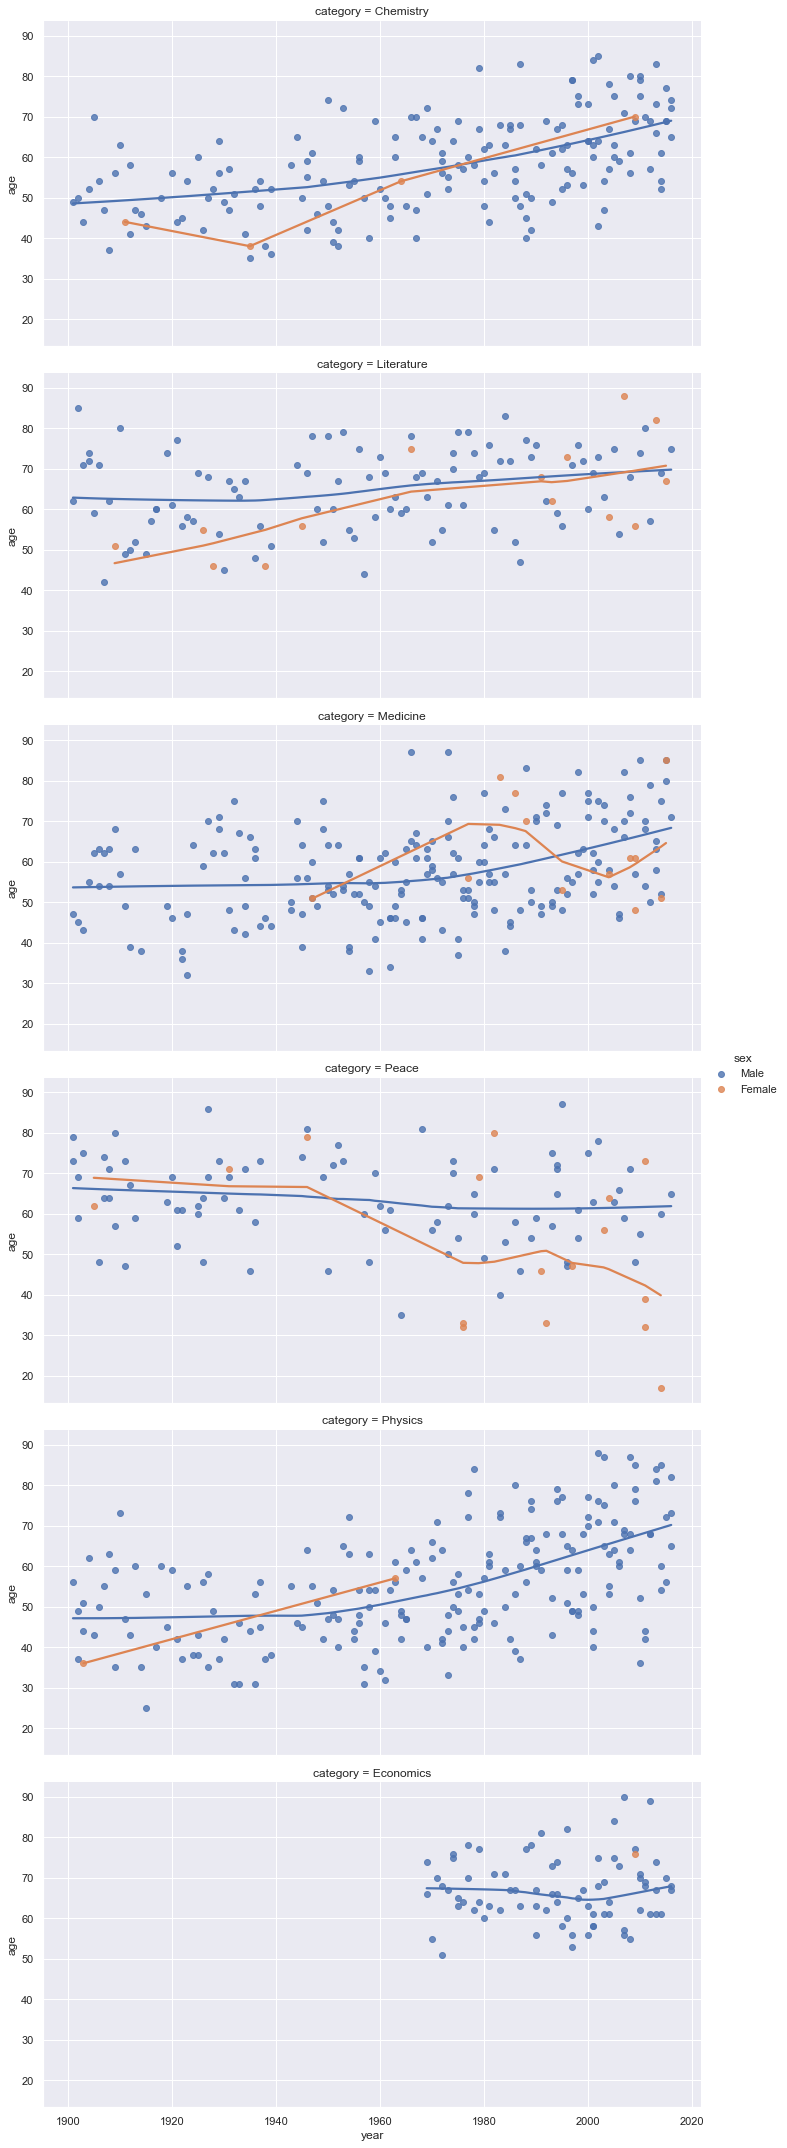

In [18]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(data = nobel, x = 'year', y ='age', row ='category', hue = 'sex', lowess=True, aspect=2) 
plt.show()

#  Oldest and youngest winners
We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

In the peace category we also a winner around 2010 that is a woman and seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

In [19]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1,'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,90


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,17


What was  the name of the youngest winner ever who in 2014 got the prize for "her struggle against the suppression of children and young people and for the right of all children to education"?